## Lab 6
#### My Name is ??
#### In collaboration with ?? 

<b>Task 1</b><br>
Sample 100 values from a binomial distribution with $n=100$ and $p =0.25$. 
Calculate the sample mean $\mu_X$ and sample variance $\sigma_X^2$ of the sampled using the formulae 
$$\mu_X =\frac{1}{n} \sum_{j=1}^{n} x_j$$
$$\sigma_X^2 = \frac{1}{n-1}\sum_{j=1}^{n} (x_j-\mu )^2. $$
Compare these values with the theoretical values for the exponential distribution $\mu = np$ and $\sigma^2 = np(1-p)$.

In [26]:
import numpy as np
from matplotlib import pyplot as plt 

def sample_mean(data):
    n = len(data)
    return 1/n *sum(data)

def sample_variance(data):
    mu = sample_mean(data)
    n = len(data)
    return 1/(n-1)*sum((data-mu)**2)

samples = np.random.binomial(100,0.25,100)
mux=sample_mean(samples)
sigx=sample_variance(samples)
mu = 100*0.25
sig =100*0.25*0.75

print(f"the sample mean is {mux} and the sample variance is {sigx}, compared to the theoretical mean of {mu} and sample variance of {sig}")

the sample mean is 24.98 and the sample variance is 22.888484848484854, compared to the theoretical mean of 25.0 and sample variance of 18.75


<b>Task 2</b><br>
Plot a histogram of the sampled data. On the same axes, plot the pdf for a normal distribution with with the theoretical mean and variance from task 1. In a markdown box, explain what you see. Based on this visual inspection, do you think the data are normally distributed?

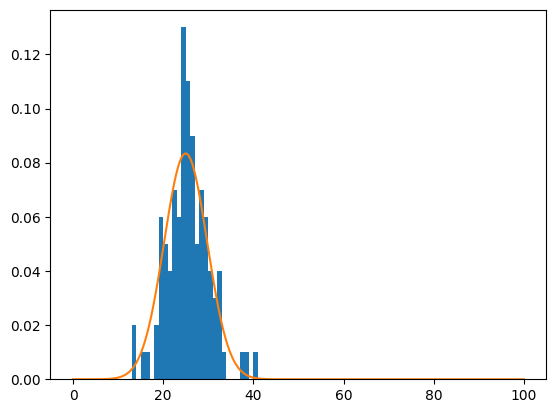

In [43]:
import scipy as sp

plt.hist(samples, bins=range(101), density =True);
xvals = np.linspace(0,100,1000)
yvals = [sp.stats.norm.pdf(x,mux,np.sqrt(sigx)) for x in xvals]
plt.plot(xvals,yvals)

<b>Task 3</b><br>
Create a function to calculuate the empirical density function of the data. Plot the empirical density function on the same axes as the cdf for the normal distribution in task 2. In a markdown box, describe what you notice.  

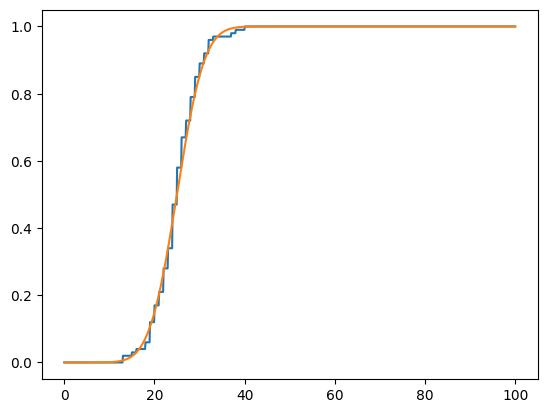

In [44]:
def empirical(data,x):
    n = len(data)
    count = 0
    for d in data:
        if d < x:
            count += 1
    return count/n

emp_vals = [empirical(samples,x) for x in xvals]
cdf_vals = [sp.stats.norm.cdf(x,mux,np.sqrt(sigx)) for x in xvals]

plt.plot(xvals,emp_vals, label = "empirical density function")
plt.plot(xvals,cdf_vals, label = "cumulative density function")

<b>Task 4</b><br>
Create a function that calculates the test statistic $D_n$. Use this function to conduct a hypothesis test to determine if $D_n$ is different from zero with significance $\alpha = 0.05$. I.e. you should reject the null hypothesis if  $D_n > K_\alpha$ where you can find the critical value $K_\alpha$ using `scipy.stats.kstwobign.ppf(1-alpha)`.

In a markdown box, explain what you are using as your null hypothesis, what the alternative hypothesis is, and what you conclude from your hypothesis test.

In [45]:
alpha = 0.05

Dn = np.sqrt(len(samples))*np.max(np.abs(np.array(emp_vals)-np.array(cdf_vals)))
Ka = sp.stats.kstwobign.ppf(1-alpha)

if Dn > Ka:
    print("We reject the null hypothesis since Dn>Ka. Therefore the values are not normally distributed.")
    print(f"Dn = {Dn}")
    print(f"Ka = {Ka}")
else:
    print("We fail to reject the null hypothesis since Dn<Ka. Therefore the values might be normally distributed.")
    print(f"Dn = {Dn}")
    print(f"Ka = {Ka}")

We fail to reject the null hypothesis since Dn<Ka. Therefore the values might be normally distributed.
Dn = 0.8346439263683847
Ka = 1.3580986393225505


The null hypothesis is that the two distributions are the same. In terms of the test-statistic, this means that $D_n$ is zero. We can reject the null hypothesis if $D_n > K_\alpha$. Based on our hypothesis test, we find that D_n is too small to reject $H_0$. Therefore we conclude that the data might be normally distributed. 

Note that the result of this test can depend on how fine of a grid you choose for $x$. If you choose to set up <code>np.linspace</code> with more than 1000 values, then the differences between jumps in the emprical density function start to matter more. 

<b>Task 5</b><br>
Sample 1000 values from an exponential distribution with $\lambda = 2$. Implement the same procedure as in tasks 1-4 with these data to determine if they are normally distributed. 

The sample mean is 2.0382192302642532 and the sample variance is 3.881133997911375


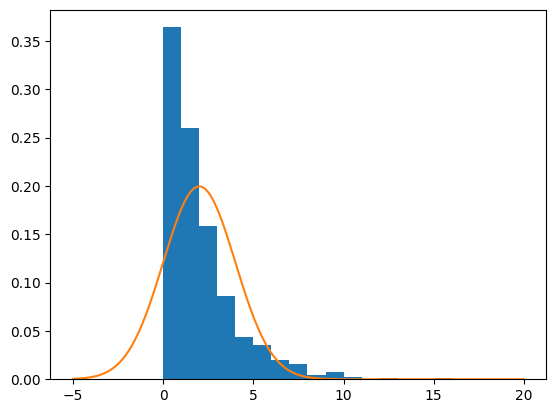

In [41]:
# Find and plot samples
lam = 2
samples2 = np.random.exponential(lam,1000)
mu2 = sample_mean(samples2)
sig2 = sample_variance(samples2)

print(f"The sample mean is {mu2} and the sample variance is {sig2}")

plt.hist(samples2, bins = range(0,20),density=True);
xvals = np.linspace(-5,20,1000)
yvals = [sp.stats.norm.pdf(x,lam,lam) for x in xvals]
plt.plot(xvals,yvals);

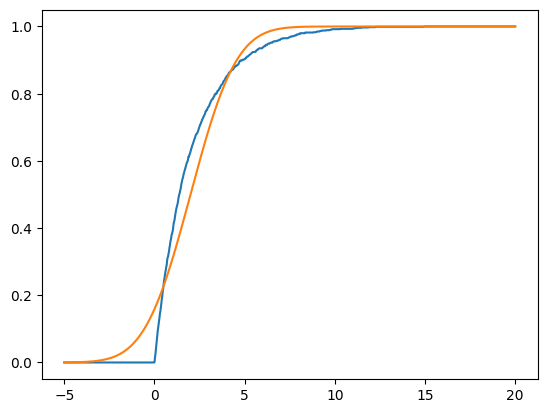

In [31]:
emp_vals = [empirical(samples2,x) for x in xvals]
cdf_vals = [sp.stats.norm.cdf(x,lam,lam) for x in xvals]

plt.plot(xvals,emp_vals)
plt.plot(xvals,cdf_vals)
## These plots look much more different than in the previous case. We should expect to reject H0 this time around

In [42]:
Dn = np.sqrt(len(samples2))*np.max(np.abs(np.array(emp_vals)-np.array(cdf_vals)))
Ka = sp.stats.kstwobign.ppf(1-alpha)

if Dn > Ka:
    print("We reject the null hypothesis since Dn>Ka. Therefore the values are not normally distributed.")
    print(f"Dn = {Dn}")
    print(f"Ka = {Ka}")
else:
    print("We fail to reject the null hypothesis since Dn<Ka. Therefore the values might be normally distributed.")

We reject the null hypothesis since Dn>Ka. Therefore the values are not normally distributed.
Dn = 2.6393758425499647
Ka = 1.3580986393225505


The null hypothesis is that the data are normally distributed. Based on the results of our hypothesis test, we reject the null hypothesis and conclude that the data are not normally distributed. 